<a href="https://colab.research.google.com/github/asegura4488/CienciaDatos/blob/main/Semana3/Sesion6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks/Cursos/CursoCienciaDatos/Semana3')
!ls

Datos  Sesion5_1.ipynb	Sesion5.ipynb  Sesion6.ipynb


In [6]:
data = pd.read_csv('Datos/BancoFinal.csv')
data.shape

(45192, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45192 entries, 0 to 45191
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45192 non-null  int64  
 1   job        45192 non-null  object 
 2   marital    45192 non-null  object 
 3   education  45192 non-null  object 
 4   default    45192 non-null  object 
 5   balance    45192 non-null  float64
 6   housing    45192 non-null  object 
 7   loan       45192 non-null  object 
 8   contact    45192 non-null  object 
 9   day        45192 non-null  int64  
 10  month      45192 non-null  object 
 11  duration   45192 non-null  float64
 12  campaign   45192 non-null  int64  
 13  pdays      45192 non-null  float64
 14  previous   45192 non-null  int64  
 15  poutcome   45192 non-null  object 
 16  y          45192 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [8]:
col_cate = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

In [9]:
col_num = ['age','balance','day','duration','campaign','pdays','previous']

In [11]:
#fig, ax = plt.subplots(len(col_cate), 1, figsize=(8,45))
#fig.subplots_adjust(hspace=0.5)

#for i, col in enumerate(col_cate):
#  sns.countplot(x=col, data=data, ax=ax[i], hue='education')
#  ax[i].set_ylabel(col)
#  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)

In [12]:
# Quitar columnas no relevantes
irrelevantes = ['contact','month']
data.drop(columns=irrelevantes, inplace=True)
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [13]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45192.00000,45192.000000,45192.000000,45192.000000,45192.000000,45192.000000,45192.000000
mean,40.93636,1374.054766,15.807554,258.097871,2.763564,40.176159,0.574128
std,10.61844,3924.295685,8.322608,257.349651,3.097019,100.104534,1.907892
min,18.00000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.00000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.00000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.00000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.00000,527532.000000,31.000000,4918.000000,63.000000,871.000000,58.000000


In [14]:
col_num = ['age','balance']
col_num

['age', 'balance']

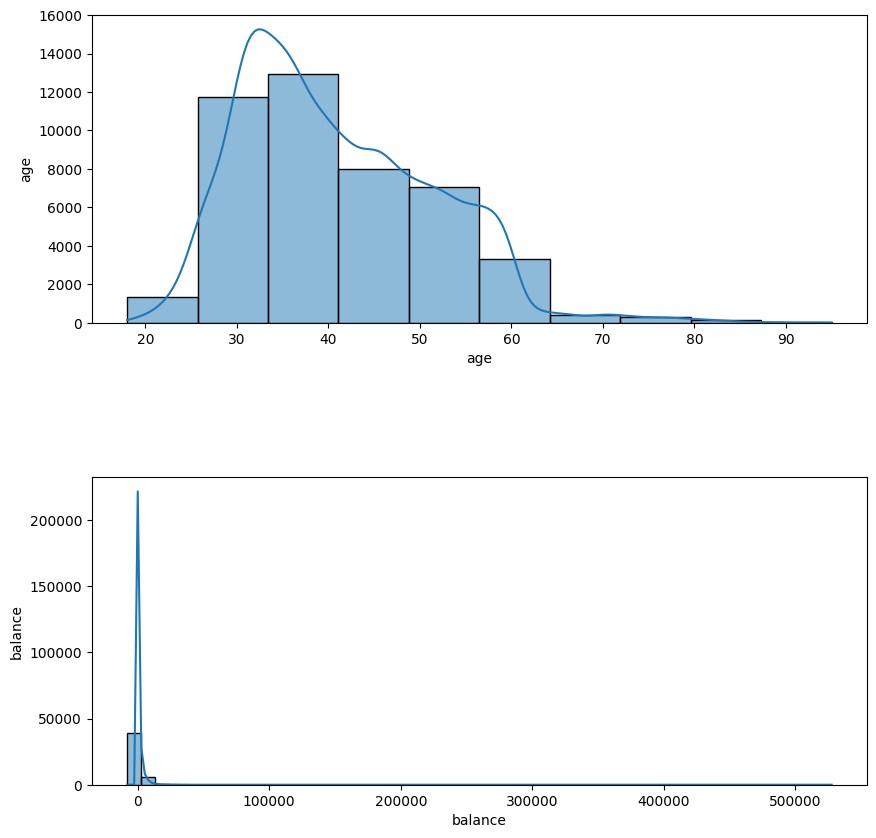

In [17]:
fig, ax = plt.subplots(len(col_num), 1, figsize=(10,10))
fig.subplots_adjust(hspace=0.5)

Nbins = [10,50]

for i, col in enumerate(col_num):
  sns.histplot(x=col, data=data, ax=ax[i], bins=Nbins[i], kde=True)
  ax[i].set_ylabel(col)

In [21]:
from scipy.stats import gaussian_kde
age = data['age'].values
kde = gaussian_kde(age)

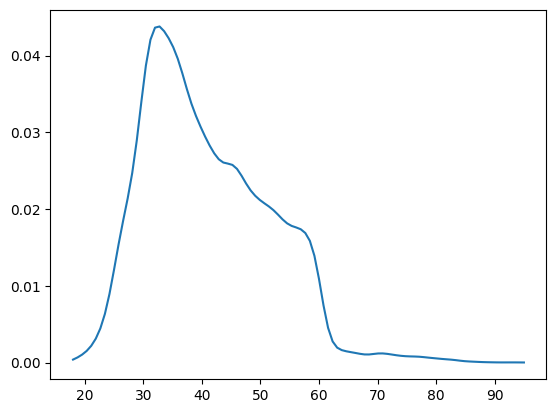

In [30]:
x_vals = np.linspace(np.min(age),np.max(age),100)
pdf = kde(x_vals)
plt.plot(x_vals,pdf)

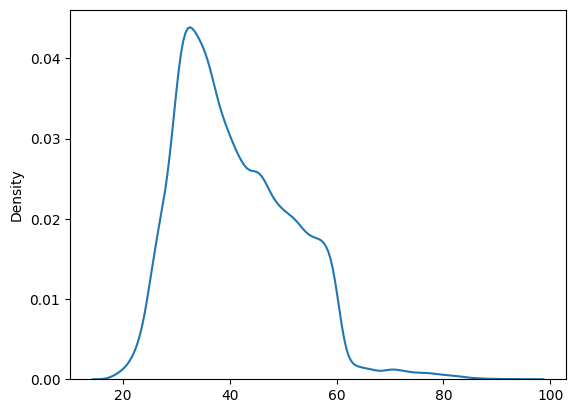

In [33]:
ax = sns.kdeplot(x=age, fill=False)

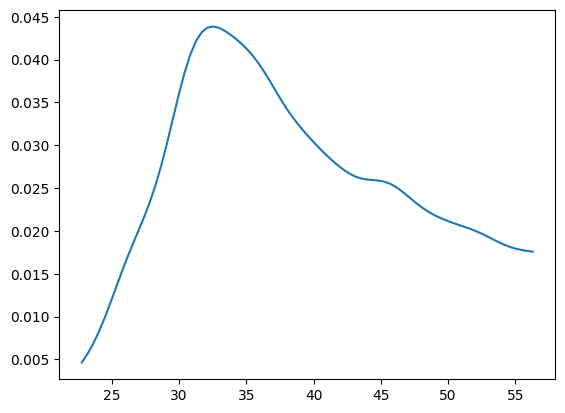

In [35]:
# Quiero extraer los puntos de kde
line = ax.lines[-1]
x,y = line.get_data()
plt.plot(x[20:100],y[20:100])

In [31]:
from scipy.integrate import quad
prob, error = quad(kde, 0, 100)
prob

0.9999999986804571

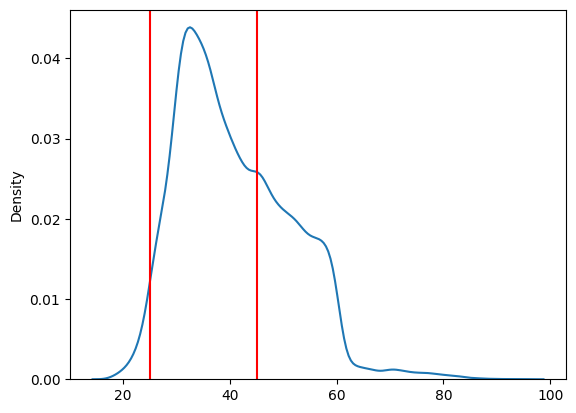

In [39]:
# Probabilidad de tener una persona entre 25 y 45 años
ax = sns.kdeplot(x=age, fill=False)
plt.axvline(x=25,color='r')
plt.axvline(x=45,color='r')

In [40]:
prob, error = quad(kde, 25, 45)
prob

0.6399167538045842

In [41]:
prob, error = quad(kde, 60, 100)
prob

0.03669902692751225

In [61]:
# Ultimo metodo, métodos MonteCarlo
samples = kde.resample(100000)
#plt.hist(samples[0])

In [62]:
prob_mc = np.mean( (samples > 25) & (samples < 45) )
prob_mc

np.float64(0.63833)

In [63]:
samples

array([[32.11042381, 31.37541193, 43.82196387, ..., 39.29790816,
        38.46372526, 32.27552939]])

<Axes: ylabel='Density'>

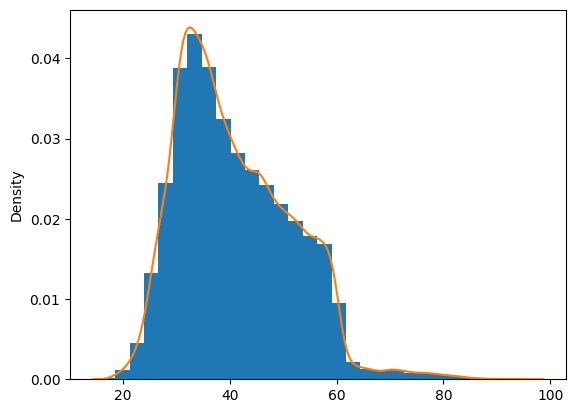

In [64]:
plt.hist(samples[0],density=True,bins=30)
sns.kdeplot(x=age, fill=False)